## Packages 

In [7]:
import pandas as pd
import scanpy as sc
import numpy as np
from anndata import AnnData
from numpy.random import default_rng
import matplotlib.pyplot as plt
import os 
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize

ModuleNotFoundError: No module named 'scanpy'

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
import torch
from torch_geometric.data import InMemoryDataset, Data, DataLoader
from torch.utils.data import TensorDataset, DataLoader

In [3]:
!pip install scanpy


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 2.1/2.1 MB 7.4 MB/s eta 0:00:00
     ---------------------------------------- 56.9/56.9 kB ? eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 129.0/129.0 kB 7.4 MB/s eta 0:00:00
     ---------------------------------------- 85.7/85.7 kB ? eta 0:00:00
     ------------------------------------- 294.9/294.9 kB 17.8 MB/s eta 0:00:00
     ---------------------------------------- 79.8/79.8 kB ? eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8073 sha256=13144e671dbadc03aa631218ae3d59c406cccefb92bfe24d5d7f5befb5cc8ab5
  Stored in directory: c:\users\mlw043\appdata\local\pip\cache\wheels\eb\4a\d2\ce798b0ff7bd8cc299e4e0eee863d4f792eddbc3c90af1adec
Successfully built session-info


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data
import torch.optim as optim
# Import statements for the transformer architecture
from torch.nn import Transformer
import argparse

from sklearn.preprocessing import LabelBinarizer, LabelEncoder,OneHotEncoder
from sklearn import metrics
import os,copy,sys
import random

from torch.utils.checkpoint import checkpoint as cp
from sklearn import svm,metrics
from sklearn.metrics import accuracy_score,f1_score

from torch.nn.parameter import Parameter
from torch.nn.modules.module import Module
from torch_geometric.nn import Sequential, BatchNorm
from typing import Callable, Iterable, Union, Tuple, Optional
import logging

## Load the data

In [14]:
adata=sc.read_h5ad('Foot-all.h5ad')

/home/jfn045/.local/lib/python3.8/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


In [15]:
adata.obs

,nCount_RNA,nFeature_RNA,nCount_SCT,nFeature_SCT,orig.ident,percent.mt,origin1,origin,tissue,integrated_snn_res.0.5,seurat_clusters
AAACCTGCATGTAAGA_1_1,2493.0,1109,2557.0,1104,DFU,5.535499,Diabetic1,Diabetic,Foot,3,3
AAACCTGGTGTGACGA_1_1,1487.0,832,2271.0,844,DFU,3.496974,Diabetic1,Diabetic,Foot,9,9
AAACGGGAGGCTACGA_1_1,9072.0,2730,2790.0,1284,DFU,1.565256,Diabetic1,Diabetic,Foot,1,1
AAACGGGTCTTGTTTG_1_1,3134.0,1501,2923.0,1494,DFU,1.882578,Diabetic1,Diabetic,Foot,10,10
AAAGATGGTCAGAGGT_1_1,2467.0,1078,2556.0,1074,DFU,1.216052,Diabetic1,Diabetic,Foot,1,1
...,...,...,...,...,...,...,...,...,...,...,...
TTTGGAGTCTACTATC.1_5_4,2360.0,1020,6375.0,1243,DFU,0.889831,Diabetic5,Non-healing DFU,Foot,0,0
TTTGGTTCACAGAGCA.1_5_4,4780.0,1912,6636.0,1911,DFU,9.037657,Diabetic5,Non-healing DFU,Foot,16,16
TTTGGTTCATAGGAGC.1_5_4,6290.0,2350,6988.0,2350,DFU,7.726550,Diabetic5,Non-healing DFU,Foot,0,0
TTTGGTTTCGGACAAG.1_5_4,4020.0,789,6136.0,898,DFU,10.771144,Diabetic5,Non-healing DFU,Foot,13,13


In [16]:
adata.obs.origin.value_counts()

Healthy            31109
Healing DFU        23058
Non-healing DFU    15278
Diabetic           10112
Name: origin, dtype: int64

## Encode labels

In [17]:
le = LabelEncoder()
y=le.fit_transform(adata.obs.origin)

In [18]:
y

array([0, 0, 0, ..., 3, 3, 3])

In [19]:
X=adata.X

In [20]:
X

array([[-0.524844  , -0.28474306, -0.4338226 , ..., -0.10125017,
         0.93788571,  2.42456629],
       [ 2.66667893, -0.82230671,  2.11308362, ...,  0.64244659,
         0.03421133, -0.53438852],
       [-0.49100263,  1.7123175 , -0.5062819 , ...,  0.54219447,
         0.11866494,  0.01254682],
       ...,
       [-0.55091677, -0.12321589, -0.38305846, ..., -0.4873353 ,
         0.54361327,  2.00138886],
       [ 0.29106554, -0.58289224, -0.43433305, ..., -0.23431877,
         0.51752762, -0.25688784],
       [ 1.8262622 , -0.7203669 ,  1.00402733, ...,  2.89122029,
         0.6164211 , -0.6890257 ]])

## Split train-test and dataloader

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42, shuffle=True, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test, test_size=0.5, random_state=42)

In [22]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3]), array([ 7078, 16140, 21776, 10695]))

In [23]:
def CreateDataLoaders (X_train, y_train, X_val, y_val, X_test, y_test,batch_size):
    #Inputs are the arrays of the mtx and labels splitted in train, test and validation
    
    #Convert the data and graph data to PyTorch tensors
    X_train_tensor = torch.Tensor(X_train)
    y_train_tensor = torch.LongTensor(y_train)
    X_val_tensor = torch.Tensor(X_val)
    y_val_tensor = torch.LongTensor(y_val)
    X_test_tensor = torch.Tensor(X_test)
    y_test_tensor = torch.LongTensor(y_test)
    
    # Create Tensor datasets
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    
    # Create data loaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    return(train_loader,val_loader,test_loader)

In [24]:
train_loader,val_loader,test_loader=CreateDataLoaders(X_train, y_train, X_val, y_val, X_test, y_test,128)

## Define the model

In [25]:
# Start defining the multiattention layer
class multiattention(nn.Module):
    def __init__(self, batch_size, n_head, n_gene, n_feature, query_gene, mode):
        super(multiattention, self).__init__()
        self.n_head = n_head
        self.n_gene = n_gene
        self.batch_size = batch_size
        self.n_feature = n_feature
        self.mode = mode
        self.query_gene = query_gene

        self.WQ = nn.Parameter(torch.Tensor(self.n_head, n_feature, 1), requires_grad=True)
        self.WK = nn.Parameter(torch.Tensor(self.n_head, n_feature, 1), requires_grad=True)
        self.WV = nn.Parameter(torch.Tensor(self.n_head, n_feature, 1), requires_grad=True)
        torch.nn.init.xavier_normal_(self.WQ, gain=1)
        torch.nn.init.xavier_normal_(self.WK, gain=1)
        torch.nn.init.xavier_normal_(self.WV)

        self.W_0 = nn.Parameter(torch.Tensor(self.n_head * [0.001]), requires_grad=True)

    def QK_diff(self, Q_seq, K_seq):
        QK_dif = -1 * torch.pow((Q_seq - K_seq), 2)
        return torch.nn.Softmax(dim=2)(QK_dif)

    def mask_softmax_self(self, x):
        d = x.shape[1]
        x = x * ((1 - torch.eye(d, d)).to(device))
        return x

    def attention(self, x, Q_seq, WK, WV):
        if self.mode == 0:
            K_seq = x * WK
            K_seq = K_seq.expand(K_seq.shape[0], K_seq.shape[1], self.n_gene)
            K_seq = K_seq.permute(0, 2, 1)
            V_seq = x * WV
            QK_product = Q_seq * K_seq
            z = torch.nn.Softmax(dim=2)(QK_product)
            z = self.mask_softmax_self(z)
            out_seq = torch.matmul(z, V_seq)
        return out_seq

    def forward(self, x):
        x = torch.reshape(x, (x.shape[0], x.shape[1], 1))
        out_h = []
        for h in range(self.n_head):
            Q_seq = x * self.WQ[h, :, :]
            Q_seq = Q_seq.expand(Q_seq.shape[0], Q_seq.shape[1], self.n_gene)
            if save_memory:
                attention_out = cp(self.attention, x, Q_seq, self.WK[h, :, :], self.WV[h, :, :])
            else:
                attention_out = self.attention(x, Q_seq, self.WK[h, :, :], self.WV[h, :, :])
            out_h.append(attention_out)
        out_seq = torch.cat(out_h, dim=2)
        out_seq = torch.matmul(out_seq, self.W_0)
        return out_seq

# Layer normalization
class LayerNorm(nn.Module):
    def __init__(self, features, eps=1e-6):
        super(LayerNorm, self).__init__()
        self.a_2 = nn.Parameter(torch.ones(features))
        self.b_2 = nn.Parameter(torch.zeros(features))
        self.eps = eps

    def forward(self, x):
        mean = x.mean(-1, keepdim=True)
        std = x.std(-1, keepdim=True)
        return self.a_2 * (x - mean) / (std + self.eps) + self.b_2

class ResidualConnection(nn.Module):
    def __init__(self, size, dropout):
        super(ResidualConnection, self).__init__()
        self.norm = LayerNorm(size)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, out):
        return x + self.norm(self.dropout(out))

In [26]:
# Define your Transformer-based model
class TransformerModel(nn.Module):
    def __init__(self, batch_size, n_head, n_gene, n_feature, n_class, query_gene, d_ff, dropout_rate, mode):
        super(TransformerModel, self).__init__()
        self.n_head = n_head
        self.n_gene = n_gene
        self.batch_size = batch_size
        self.n_feature = n_feature
        self.n_class = n_class
        self.query_gene = query_gene
        self.d_ff = d_ff
        self.dropout_rate = dropout_rate
        self.mode = mode
        self.multiattention1 = multiattention(self.batch_size, self.n_head, self.n_gene, self.n_feature, self.query_gene, self.mode)
        self.multiattention2 = multiattention(self.batch_size, self.n_head, self.n_gene, self.n_feature, self.query_gene, self.mode)
        self.multiattention3 = multiattention(self.batch_size, self.n_head, self.n_gene, self.n_feature, self.query_gene, self.mode)
        self.fc = nn.Linear(self.n_gene, self.n_class)
        torch.nn.init.xavier_uniform_(self.fc.weight, gain=1)
        self.ffn1 = nn.Linear(self.n_gene, self.d_ff)
        self.ffn2 = nn.Linear(self.d_ff, self.n_gene)
        self.dropout = nn.Dropout(dropout_rate)
        self.sublayer = ResidualConnection(self.n_gene, dropout_rate)
        self.output_projection=nn.Linear(n_gene, 128)

    def feedforward(self, x):
        out = F.relu(self.ffn1(x))
        out = self.ffn2(self.dropout(out))
        return out

    def forward(self, gcn_embeddings):  # Pass GCN embeddings as input
        # Integrate GCN embeddings into the input
        #print(x.shape)
        #print(gcn_embeddings.shape)
        x = gcn_embeddings
        
        out_attn = self.multiattention1(x)
        out_attn_1 = self.sublayer(x, out_attn)
        out_attn_2 = self.multiattention2(out_attn_1)
        out_attn_2 = self.sublayer(out_attn_1, out_attn_2)
        out_attn_3 = self.multiattention3(out_attn_2)
        out_attn_3 = self.sublayer(out_attn_2, out_attn_3)
        if act_fun == 'relu':
            out_attn_3 = F.relu(out_attn_3)
        if act_fun == 'leakyrelu':
            m = torch.nn.LeakyReLU(0.1)
            out_attn_3 = m(out_attn_3)
        if act_fun == 'gelu':
            m = torch.nn.GELU()
            out_attn_3 = m(out_attn_3)
        #out_attn_3=self.output_projection(out_attn_3)
        y_pred = self.fc(out_attn_3)
        y_pred = F.log_softmax(y_pred, dim=1)

        return out_attn_3,y_pred

# Define your integrated model DeepTME
class Transformer(nn.Module):
    def __init__(self, batch_size, n_head, n_gene,num_classes, d_ff, dropout_rate, mode):
        super(Transformer, self).__init__()


        # Transformer layers
        self.transformer = TransformerModel(batch_size, n_head, n_gene, n_gene,num_classes, n_gene, d_ff, dropout_rate, mode)

        
    def forward(self, x):
        # Forward pass through 
        embeddings,y_pred= self.transformer(x)

        return y_pred,embeddings

### Set model parameters

In [28]:
# Define DeepTME parameters

batch_size = 128
n_head = 3
n_gene = 1064
num_classes=4
d_ff = 1024
dropout_rate = 0.3
mode = 0
save_memory=False
act_fun = 'relu'  # Choose 'relu', 'leakyrelu', 'gelu', or 'nan'

In [29]:
# Create Model
model = Transformer(batch_size, n_head, n_gene,num_classes, d_ff, dropout_rate, mode)

In [30]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [31]:
model=nn.DataParallel(model)
model.to(device)

DataParallel(
  (module): Transformer(
    (transformer): TransformerModel(
      (multiattention1): multiattention()
      (multiattention2): multiattention()
      (multiattention3): multiattention()
      (fc): Linear(in_features=1064, out_features=4, bias=True)
      (ffn1): Linear(in_features=1064, out_features=1024, bias=True)
      (ffn2): Linear(in_features=1024, out_features=1064, bias=True)
      (dropout): Dropout(p=0.3, inplace=False)
      (sublayer): ResidualConnection(
        (norm): LayerNorm()
        (dropout): Dropout(p=0.3, inplace=False)
      )
      (output_projection): Linear(in_features=1064, out_features=128, bias=True)
    )
  )
)

In [32]:
# Define loss function and optimizer
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)

## Train the model

In [33]:
num_epochs = 100
verbose=True
verbose_interval=10

In [34]:
from tqdm import tqdm

# Define the progress bar for training
train_bar = tqdm(total=len(train_loader), desc='Training', position=0, leave=True)

# Define the progress bar for validation
val_bar = tqdm(total=len(val_loader), desc='Validation', position=0, leave=True)

best_val_loss = float('inf')  # Initialize the best validation loss
patience = 10  # Number of epochs with no improvement to wait before early stopping
no_improvement_count = 0  # Initialize the no improvement counter

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    for i, (batch_X) in enumerate(train_loader):
        inputs = batch_X[0].to(device)   # Adjust for your data format
        labels = batch_X[1].to(device)   # Adjust for your data format
        labels = labels.view(-1)
        optimizer.zero_grad()  # Zero the gradients

        # Forward pass through the model
        output,embeddings= model(inputs) 


        # Calculate loss (you may need to adapt the loss function)
        loss= F.nll_loss(output, labels)
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        total_loss += loss.item()
        _, predicted = torch.max(output, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)

        inputs.detach()
        labels.detach()

        train_bar.update(1)  # Update the training progress bar

    # Calculate accuracy and average loss for the epoch
    accuracy = 100.0 * correct_predictions / total_samples
    average_loss = total_loss / len(train_loader)

    # Print verbose output for the epoch
    print(f"Epoch [{epoch + 1}/{num_epochs}]")
    print(f"Train Loss: {average_loss:.4f}, Accuracy: {accuracy:.2f}%")

    train_bar.n = 0  # Reset the training progress bar
    train_bar.last_print_n = 0
    train_bar.refresh()

    # Validation
   
    total_val_loss = 0.0
    correct_val_predictions = 0
    total_val_samples = 0
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        model.eval()
        for i, (val_batch) in enumerate(val_loader):
            inputs = val_batch[0].to(device)   # Adjust for your data format
            labels = val_batch[1].to(device)   # Adjust for your data format
            labels = labels.view(-1)

            # Forward pass through the model for validation
            val_output,embeddings = model(inputs)   # Pass edge_index for GCN
            val_loss= F.nll_loss(val_output, labels)
            total_val_loss += val_loss.item()
            _, val_predicted = torch.max(val_output, 1)
            correct_val_predictions += (val_predicted == labels).sum().item()
            total_val_samples += labels.size(0)

            inputs.detach()
            labels.detach()

            val_bar.update(1)  # Update the validation progress bar

    # Calculate validation accuracy and average loss for the epoch
    val_accuracy = 100.0 * correct_val_predictions / total_val_samples
    val_average_loss = total_val_loss / len(val_loader)

    # Print validation results for the epoch
    print(f"Validation Loss: {val_average_loss:.4f}, Accuracy: {val_accuracy:.2f}%")
    
    # Check for early stopping
    if val_average_loss < best_val_loss:
        best_val_loss = val_average_loss
        no_improvement_count = 0
    else:
        no_improvement_count += 1

    if no_improvement_count >= patience:
        print(f"Early stopping after {patience} epochs of no improvement.")
        break  # Stop training if no improvement for 'patience' epochs

    val_bar.n = 0  # Reset the validation progress bar
    val_bar.last_print_n = 0
    val_bar.refresh()

# Close the progress bars
train_bar.close()
val_bar.close()

Validation:   4%|█▎                              | 4/94 [00:43<12:18,  8.20s/it]

Epoch [1/100]
Train Loss: 1.3217, Accuracy: 45.82%


Training:   0%|▏                                | 2/436 [00:47<04:49,  1.50it/s]

Validation Loss: 1.0761, Accuracy: 56.46%


Validation:   4%|█▎                              | 4/94 [01:27<04:59,  3.33s/it]

Epoch [2/100]
Train Loss: 1.0673, Accuracy: 56.71%


Training:   0%|▏                                | 2/436 [01:31<04:47,  1.51it/s]

Validation Loss: 1.0103, Accuracy: 59.68%


Validation:   4%|█▎                              | 4/94 [02:11<04:59,  3.33s/it]

Epoch [3/100]
Train Loss: 1.0170, Accuracy: 59.10%


Training:   0%|▏                                | 2/436 [02:15<04:45,  1.52it/s]

Validation Loss: 0.9948, Accuracy: 60.52%


Validation:   4%|█▎                              | 4/94 [02:55<04:58,  3.31s/it]

Epoch [4/100]
Train Loss: 0.9865, Accuracy: 60.58%


Training:   0%|▏                                | 2/436 [02:59<04:42,  1.54it/s]

Validation Loss: 0.9797, Accuracy: 61.38%


Validation:   4%|█▎                              | 4/94 [03:39<04:58,  3.31s/it]

Epoch [5/100]
Train Loss: 0.9703, Accuracy: 61.27%


Training:   0%|▏                                | 2/436 [03:43<04:43,  1.53it/s]

Validation Loss: 0.9771, Accuracy: 61.35%


Validation:   4%|█▎                              | 4/94 [04:23<04:57,  3.30s/it]

Epoch [6/100]
Train Loss: 0.9710, Accuracy: 61.30%


Validation:   0%|                                | 0/94 [04:27<00:03, 25.50it/s]

Validation Loss: 0.9742, Accuracy: 61.49%


Validation:   4%|█▎                              | 4/94 [05:07<04:58,  3.32s/it]

Epoch [7/100]
Train Loss: 0.9568, Accuracy: 61.94%


Training:   0%|▏                                | 2/436 [05:11<04:43,  1.53it/s]

Validation Loss: 0.9674, Accuracy: 61.78%


Validation:   4%|█▎                              | 4/94 [05:51<04:57,  3.31s/it]

Epoch [8/100]
Train Loss: 0.9488, Accuracy: 62.21%


Training:   0%|▏                                | 2/436 [05:55<04:44,  1.52it/s]

Validation Loss: 0.9625, Accuracy: 61.84%


Validation:   4%|█▎                              | 4/94 [06:35<04:57,  3.30s/it]

Epoch [9/100]
Train Loss: 0.9433, Accuracy: 62.77%


Training:   0%|▏                                | 2/436 [06:39<04:49,  1.50it/s]

Validation Loss: 0.9635, Accuracy: 61.92%


Validation:   4%|█▎                              | 4/94 [07:19<04:57,  3.31s/it]

Epoch [10/100]
Train Loss: 0.9513, Accuracy: 62.06%


Training:   0%|▏                                | 2/436 [07:23<04:45,  1.52it/s]

Validation Loss: 0.9599, Accuracy: 62.26%


Validation:   4%|█▎                              | 4/94 [08:03<04:56,  3.29s/it]

Epoch [11/100]
Train Loss: 0.9333, Accuracy: 63.14%


Training:   0%|▏                                | 2/436 [08:06<04:45,  1.52it/s]

Validation Loss: 0.9582, Accuracy: 62.29%


Validation:   4%|█▎                              | 4/94 [08:46<04:56,  3.30s/it]

Epoch [12/100]
Train Loss: 0.9319, Accuracy: 63.05%


Training:   0%|▏                                | 2/436 [08:50<04:44,  1.53it/s]

Validation Loss: 0.9565, Accuracy: 62.44%


Validation:   4%|█▎                              | 4/94 [09:30<04:57,  3.31s/it]

Epoch [13/100]
Train Loss: 0.9325, Accuracy: 63.02%


Training:   0%|▏                                | 2/436 [09:34<04:45,  1.52it/s]

Validation Loss: 0.9459, Accuracy: 62.79%


Validation:   4%|█▎                              | 4/94 [10:14<04:57,  3.31s/it]

Epoch [14/100]
Train Loss: 0.9114, Accuracy: 63.92%


Training:   0%|▏                                | 2/436 [10:18<04:51,  1.49it/s]

Validation Loss: 0.9236, Accuracy: 63.99%


Validation:   4%|█▎                              | 4/94 [10:58<04:57,  3.30s/it]

Epoch [15/100]
Train Loss: 0.8780, Accuracy: 65.19%


Training:   0%|▏                                | 2/436 [11:02<04:49,  1.50it/s]

Validation Loss: 0.9065, Accuracy: 64.97%


Validation:   4%|█▎                              | 4/94 [11:42<04:57,  3.30s/it]

Epoch [16/100]
Train Loss: 0.8533, Accuracy: 66.23%


Training:   0%|▏                                | 2/436 [11:46<04:44,  1.52it/s]

Validation Loss: 0.8924, Accuracy: 65.55%


Validation:   4%|█▎                              | 4/94 [12:26<04:58,  3.31s/it]

Epoch [17/100]
Train Loss: 0.8269, Accuracy: 67.33%


Training:   0%|▏                                | 2/436 [12:30<04:43,  1.53it/s]

Validation Loss: 0.8817, Accuracy: 66.25%


Validation:   4%|█▎                              | 4/94 [13:10<04:58,  3.31s/it]

Epoch [18/100]
Train Loss: 0.8073, Accuracy: 68.28%


Training:   0%|▏                                | 2/436 [13:14<04:40,  1.55it/s]

Validation Loss: 0.8879, Accuracy: 66.52%


Validation:   4%|█▎                              | 4/94 [13:54<04:58,  3.32s/it]

Epoch [19/100]
Train Loss: 0.7918, Accuracy: 68.87%


Training:   0%|▏                                | 2/436 [13:58<04:39,  1.55it/s]

Validation Loss: 0.8889, Accuracy: 66.70%


Validation:   4%|█▎                              | 4/94 [14:38<05:00,  3.34s/it]

Epoch [20/100]
Train Loss: 0.7774, Accuracy: 69.47%


Training:   0%|▏                                | 2/436 [14:42<04:49,  1.50it/s]

Validation Loss: 0.8741, Accuracy: 67.22%


Validation:   4%|█▎                              | 4/94 [15:22<04:58,  3.31s/it]

Epoch [21/100]
Train Loss: 0.7616, Accuracy: 69.99%


Training:   0%|▏                                | 2/436 [15:26<04:49,  1.50it/s]

Validation Loss: 0.8459, Accuracy: 68.22%


Validation:   4%|█▎                              | 4/94 [16:06<04:58,  3.32s/it]

Epoch [22/100]
Train Loss: 0.7439, Accuracy: 70.89%


Training:   0%|▏                                | 2/436 [16:10<04:45,  1.52it/s]

Validation Loss: 0.8474, Accuracy: 68.41%


Validation:   4%|█▎                              | 4/94 [16:50<04:57,  3.30s/it]

Epoch [23/100]
Train Loss: 0.7301, Accuracy: 71.52%


Training:   0%|▏                                | 2/436 [16:54<04:49,  1.50it/s]

Validation Loss: 0.8307, Accuracy: 69.18%


Validation:   4%|█▎                              | 4/94 [17:34<04:58,  3.31s/it]

Epoch [24/100]
Train Loss: 0.7151, Accuracy: 72.28%


Training:   0%|▏                                | 2/436 [17:38<04:46,  1.52it/s]

Validation Loss: 0.8123, Accuracy: 69.73%


Validation:   4%|█▎                              | 4/94 [18:18<04:57,  3.31s/it]

Epoch [25/100]
Train Loss: 0.7001, Accuracy: 72.70%


Training:   0%|▏                                | 2/436 [18:22<04:46,  1.51it/s]

Validation Loss: 0.8056, Accuracy: 69.86%


Validation:   4%|█▎                              | 4/94 [19:02<04:58,  3.32s/it]

Epoch [26/100]
Train Loss: 0.6831, Accuracy: 73.67%


Training:   0%|▏                                | 2/436 [19:06<04:43,  1.53it/s]

Validation Loss: 0.7880, Accuracy: 70.86%


Validation:   4%|█▎                              | 4/94 [19:46<04:57,  3.31s/it]

Epoch [27/100]
Train Loss: 0.6698, Accuracy: 74.13%


Training:   0%|▏                                | 2/436 [19:50<04:43,  1.53it/s]

Validation Loss: 0.7975, Accuracy: 71.16%


Validation:   4%|█▎                              | 4/94 [20:30<04:58,  3.31s/it]

Epoch [28/100]
Train Loss: 0.6517, Accuracy: 74.73%


Training:   0%|▏                                | 2/436 [20:34<04:46,  1.51it/s]

Validation Loss: 0.7910, Accuracy: 71.03%


Validation:   4%|█▎                              | 4/94 [21:14<04:57,  3.31s/it]

Epoch [29/100]
Train Loss: 0.6375, Accuracy: 75.36%


Training:   0%|▏                                | 2/436 [21:18<04:42,  1.54it/s]

Validation Loss: 0.7921, Accuracy: 71.41%


Validation:   4%|█▎                              | 4/94 [21:58<04:57,  3.31s/it]

Epoch [30/100]
Train Loss: 0.6212, Accuracy: 76.03%


Training:   0%|▏                                | 2/436 [22:02<04:45,  1.52it/s]

Validation Loss: 0.7762, Accuracy: 72.26%


Validation:   4%|█▎                              | 4/94 [22:42<04:59,  3.33s/it]

Epoch [31/100]
Train Loss: 0.6089, Accuracy: 76.57%


Training:   0%|▏                                | 2/436 [22:46<04:49,  1.50it/s]

Validation Loss: 0.7611, Accuracy: 73.00%


Validation:   4%|█▎                              | 4/94 [23:26<04:59,  3.33s/it]

Epoch [32/100]
Train Loss: 0.5950, Accuracy: 77.14%


Training:   0%|▏                                | 2/436 [23:30<04:44,  1.52it/s]

Validation Loss: 0.7603, Accuracy: 73.19%


Validation:   4%|█▎                              | 4/94 [24:10<04:57,  3.31s/it]

Epoch [33/100]
Train Loss: 0.5846, Accuracy: 77.52%


Training:   0%|▏                                | 2/436 [24:14<04:52,  1.49it/s]

Validation Loss: 0.7457, Accuracy: 74.07%


Validation:   4%|█▎                              | 4/94 [24:54<04:58,  3.31s/it]

Epoch [34/100]
Train Loss: 0.5736, Accuracy: 77.99%


Training:   0%|▏                                | 2/436 [24:58<04:45,  1.52it/s]

Validation Loss: 0.7611, Accuracy: 73.77%


Validation:   4%|█▎                              | 4/94 [25:38<04:58,  3.31s/it]

Epoch [35/100]
Train Loss: 0.5654, Accuracy: 78.35%


Training:   0%|▏                                | 2/436 [25:42<04:39,  1.55it/s]

Validation Loss: 0.7441, Accuracy: 74.36%


Validation:   4%|█▎                              | 4/94 [26:22<04:58,  3.31s/it]

Epoch [36/100]
Train Loss: 0.5503, Accuracy: 78.91%


Training:   0%|▏                                | 2/436 [26:26<04:41,  1.54it/s]

Validation Loss: 0.7407, Accuracy: 75.05%


Validation:   4%|█▎                              | 4/94 [27:06<04:57,  3.31s/it]

Epoch [37/100]
Train Loss: 0.5422, Accuracy: 79.29%


Training:   0%|▏                                | 2/436 [27:10<04:43,  1.53it/s]

Validation Loss: 0.7388, Accuracy: 75.11%


Validation:   4%|█▎                              | 4/94 [27:50<04:57,  3.31s/it]

Epoch [38/100]
Train Loss: 0.5329, Accuracy: 79.65%


Training:   0%|▏                                | 2/436 [27:54<04:44,  1.52it/s]

Validation Loss: 0.7368, Accuracy: 75.36%


Validation:   4%|█▎                              | 4/94 [28:34<04:57,  3.31s/it]

Epoch [39/100]
Train Loss: 0.5238, Accuracy: 79.98%


Training:   0%|▏                                | 2/436 [28:38<04:47,  1.51it/s]

Validation Loss: 0.7459, Accuracy: 75.02%


Validation:   4%|█▎                              | 4/94 [29:18<04:57,  3.31s/it]

Epoch [40/100]
Train Loss: 0.5168, Accuracy: 80.33%


Training:   0%|▏                                | 2/436 [29:22<04:41,  1.54it/s]

Validation Loss: 0.7365, Accuracy: 75.36%


Validation:   4%|█▎                              | 4/94 [30:02<04:57,  3.31s/it]

Epoch [41/100]
Train Loss: 0.5111, Accuracy: 80.45%


Training:   0%|▏                                | 2/436 [30:06<04:47,  1.51it/s]

Validation Loss: 0.7270, Accuracy: 75.81%


Validation:   4%|█▎                              | 4/94 [30:46<04:57,  3.31s/it]

Epoch [42/100]
Train Loss: 0.5025, Accuracy: 80.84%


Training:   0%|▏                                | 2/436 [30:50<04:42,  1.54it/s]

Validation Loss: 0.7623, Accuracy: 75.45%


Validation:   4%|█▎                              | 4/94 [31:30<04:57,  3.30s/it]

Epoch [43/100]
Train Loss: 0.4934, Accuracy: 81.24%


Training:   0%|▏                                | 2/436 [31:33<04:45,  1.52it/s]

Validation Loss: 0.7398, Accuracy: 76.01%


Validation:   4%|█▎                              | 4/94 [32:14<04:58,  3.32s/it]

Epoch [44/100]
Train Loss: 0.4941, Accuracy: 81.12%


Training:   0%|▏                                | 2/436 [32:17<04:47,  1.51it/s]

Validation Loss: 0.7341, Accuracy: 76.07%


Validation:   4%|█▎                              | 4/94 [32:58<04:57,  3.31s/it]

Epoch [45/100]
Train Loss: 0.4833, Accuracy: 81.70%


Training:   0%|▏                                | 2/436 [33:01<04:44,  1.52it/s]

Validation Loss: 0.7456, Accuracy: 76.13%


Validation:   4%|█▎                              | 4/94 [33:41<04:57,  3.30s/it]

Epoch [46/100]
Train Loss: 0.4774, Accuracy: 81.72%


Training:   0%|▏                                | 2/436 [33:45<04:46,  1.52it/s]

Validation Loss: 0.7508, Accuracy: 76.27%


Validation:   4%|█▎                              | 4/94 [34:25<04:57,  3.30s/it]

Epoch [47/100]
Train Loss: 0.4734, Accuracy: 82.08%


Training:   0%|▏                                | 2/436 [34:29<04:41,  1.54it/s]

Validation Loss: 0.7316, Accuracy: 76.27%


Validation:   4%|█▎                              | 4/94 [35:09<04:56,  3.30s/it]

Epoch [48/100]
Train Loss: 0.4663, Accuracy: 82.17%


Training:   0%|▏                                | 2/436 [35:13<04:41,  1.54it/s]

Validation Loss: 0.7310, Accuracy: 76.37%


Validation:   4%|█▎                              | 4/94 [35:53<04:57,  3.30s/it]

Epoch [49/100]
Train Loss: 0.4591, Accuracy: 82.54%


Training:   0%|▏                                | 2/436 [35:57<04:39,  1.55it/s]

Validation Loss: 0.7380, Accuracy: 76.57%


Validation:   4%|█▎                              | 4/94 [36:37<04:57,  3.30s/it]

Epoch [50/100]
Train Loss: 0.4556, Accuracy: 82.82%


Training:   0%|▏                                | 2/436 [36:40<04:42,  1.54it/s]

Validation Loss: 0.7192, Accuracy: 76.89%


Validation:   4%|█▎                              | 4/94 [37:20<04:56,  3.30s/it]

Epoch [51/100]
Train Loss: 0.4496, Accuracy: 83.00%


Training:   0%|▏                                | 2/436 [37:24<04:48,  1.51it/s]

Validation Loss: 0.7151, Accuracy: 77.52%


Validation:   4%|█▎                              | 4/94 [38:04<04:56,  3.29s/it]

Epoch [52/100]
Train Loss: 0.4446, Accuracy: 83.06%


Training:   0%|▏                                | 2/436 [38:08<04:41,  1.54it/s]

Validation Loss: 0.7146, Accuracy: 77.21%


Validation:   4%|█▎                              | 4/94 [38:48<04:57,  3.31s/it]

Epoch [53/100]
Train Loss: 0.4376, Accuracy: 83.24%


Training:   0%|▏                                | 2/436 [38:52<04:47,  1.51it/s]

Validation Loss: 0.7085, Accuracy: 77.53%


Validation:   4%|█▎                              | 4/94 [39:32<04:59,  3.33s/it]

Epoch [54/100]
Train Loss: 0.4383, Accuracy: 83.46%


Training:   0%|▏                                | 2/436 [39:36<04:43,  1.53it/s]

Validation Loss: 0.7087, Accuracy: 77.64%


Validation:   4%|█▎                              | 4/94 [40:16<04:58,  3.32s/it]

Epoch [55/100]
Train Loss: 0.4294, Accuracy: 83.65%


Training:   0%|▏                                | 2/436 [40:20<04:48,  1.50it/s]

Validation Loss: 0.7009, Accuracy: 77.66%


Validation:   4%|█▎                              | 4/94 [41:00<04:58,  3.31s/it]

Epoch [56/100]
Train Loss: 0.4274, Accuracy: 83.89%


Training:   0%|▏                                | 2/436 [41:04<04:47,  1.51it/s]

Validation Loss: 0.6813, Accuracy: 78.23%


Validation:   4%|█▎                              | 4/94 [41:44<04:57,  3.31s/it]

Epoch [57/100]
Train Loss: 0.4204, Accuracy: 84.12%


Training:   0%|▏                                | 2/436 [41:48<04:47,  1.51it/s]

Validation Loss: 0.6776, Accuracy: 78.36%


Validation:   4%|█▎                              | 4/94 [42:28<04:58,  3.31s/it]

Epoch [58/100]
Train Loss: 0.4168, Accuracy: 84.18%


Training:   0%|▏                                | 2/436 [42:32<04:42,  1.53it/s]

Validation Loss: 0.6681, Accuracy: 78.93%


Validation:   4%|█▎                              | 4/94 [43:12<04:57,  3.31s/it]

Epoch [59/100]
Train Loss: 0.4100, Accuracy: 84.35%


Training:   0%|▏                                | 2/436 [43:16<04:40,  1.55it/s]

Validation Loss: 0.6711, Accuracy: 79.16%


Validation:   4%|█▎                              | 4/94 [43:56<04:57,  3.30s/it]

Epoch [60/100]
Train Loss: 0.4010, Accuracy: 84.75%


Training:   0%|▏                                | 2/436 [44:00<04:45,  1.52it/s]

Validation Loss: 0.6688, Accuracy: 79.29%


Validation:   4%|█▎                              | 4/94 [44:40<04:57,  3.30s/it]

Epoch [61/100]
Train Loss: 0.4027, Accuracy: 84.84%


Training:   0%|▏                                | 2/436 [44:44<04:42,  1.54it/s]

Validation Loss: 0.6561, Accuracy: 79.86%


Validation:   4%|█▎                              | 4/94 [45:24<04:57,  3.31s/it]

Epoch [62/100]
Train Loss: 0.3954, Accuracy: 85.16%


Training:   0%|▏                                | 2/436 [45:28<04:44,  1.53it/s]

Validation Loss: 0.6582, Accuracy: 79.70%


Validation:   4%|█▎                              | 4/94 [46:08<04:57,  3.30s/it]

Epoch [63/100]
Train Loss: 0.3902, Accuracy: 85.27%


Training:   0%|▏                                | 2/436 [46:12<04:42,  1.53it/s]

Validation Loss: 0.6538, Accuracy: 79.73%


Validation:   4%|█▎                              | 4/94 [46:52<04:57,  3.30s/it]

Epoch [64/100]
Train Loss: 0.3918, Accuracy: 85.19%


Training:   0%|▏                                | 2/436 [46:55<04:43,  1.53it/s]

Validation Loss: 0.6603, Accuracy: 79.43%


Validation:   4%|█▎                              | 4/94 [47:35<04:57,  3.30s/it]

Epoch [65/100]
Train Loss: 0.3827, Accuracy: 85.49%


Training:   0%|▏                                | 2/436 [47:39<04:41,  1.54it/s]

Validation Loss: 0.6593, Accuracy: 80.05%


Validation:   4%|█▎                              | 4/94 [48:19<04:57,  3.31s/it]

Epoch [66/100]
Train Loss: 0.3790, Accuracy: 85.62%


Training:   0%|▏                                | 2/436 [48:23<04:40,  1.55it/s]

Validation Loss: 0.6507, Accuracy: 80.10%


Validation:   4%|█▎                              | 4/94 [49:03<04:58,  3.31s/it]

Epoch [67/100]
Train Loss: 0.3759, Accuracy: 85.92%


Training:   0%|▏                                | 2/436 [49:07<04:42,  1.54it/s]

Validation Loss: 0.6376, Accuracy: 80.62%


Validation:   4%|█▎                              | 4/94 [49:47<04:57,  3.30s/it]

Epoch [68/100]
Train Loss: 0.3747, Accuracy: 85.89%


Training:   0%|▏                                | 2/436 [49:51<04:49,  1.50it/s]

Validation Loss: 0.6102, Accuracy: 81.01%


Validation:   4%|█▎                              | 4/94 [50:31<04:57,  3.30s/it]

Epoch [69/100]
Train Loss: 0.3687, Accuracy: 86.25%


Training:   0%|▏                                | 2/436 [50:35<04:46,  1.52it/s]

Validation Loss: 0.6381, Accuracy: 80.54%


Validation:   4%|█▎                              | 4/94 [51:15<04:57,  3.31s/it]

Epoch [70/100]
Train Loss: 0.3646, Accuracy: 86.22%


Training:   0%|▏                                | 2/436 [51:19<04:42,  1.54it/s]

Validation Loss: 0.6238, Accuracy: 80.96%


Validation:   4%|█▎                              | 4/94 [51:59<04:58,  3.31s/it]

Epoch [71/100]
Train Loss: 0.3658, Accuracy: 86.24%


Training:   0%|▏                                | 2/436 [52:03<04:42,  1.54it/s]

Validation Loss: 0.6264, Accuracy: 80.86%


Validation:   4%|█▎                              | 4/94 [52:43<04:57,  3.31s/it]

Epoch [72/100]
Train Loss: 0.3613, Accuracy: 86.45%


Training:   0%|▏                                | 2/436 [52:47<04:47,  1.51it/s]

Validation Loss: 0.6108, Accuracy: 81.24%


Validation:   4%|█▎                              | 4/94 [53:27<04:57,  3.30s/it]

Epoch [73/100]
Train Loss: 0.3546, Accuracy: 86.73%


Training:   0%|▏                                | 2/436 [53:30<04:40,  1.55it/s]

Validation Loss: 0.6089, Accuracy: 81.10%


Validation:   4%|█▎                              | 4/94 [54:10<04:56,  3.29s/it]

Epoch [74/100]
Train Loss: 0.3507, Accuracy: 86.65%


Training:   0%|▏                                | 2/436 [54:14<04:41,  1.54it/s]

Validation Loss: 0.6242, Accuracy: 81.46%


Validation:   4%|█▎                              | 4/94 [54:54<04:58,  3.31s/it]

Epoch [75/100]
Train Loss: 0.3521, Accuracy: 86.82%


Training:   0%|▏                                | 2/436 [54:58<04:40,  1.55it/s]

Validation Loss: 0.6349, Accuracy: 81.39%


Validation:   4%|█▎                              | 4/94 [55:38<04:57,  3.31s/it]

Epoch [76/100]
Train Loss: 0.3525, Accuracy: 86.85%


Training:   0%|▏                                | 2/436 [55:42<04:37,  1.56it/s]

Validation Loss: 0.6136, Accuracy: 81.30%


Validation:   4%|█▎                              | 4/94 [56:22<04:55,  3.29s/it]

Epoch [77/100]
Train Loss: 0.3469, Accuracy: 86.92%


Training:   0%|▏                                | 2/436 [56:26<04:44,  1.52it/s]

Validation Loss: 0.5939, Accuracy: 82.08%


Validation:   4%|█▎                              | 4/94 [57:06<04:57,  3.30s/it]

Epoch [78/100]
Train Loss: 0.3423, Accuracy: 87.23%


Training:   0%|▏                                | 2/436 [57:10<04:47,  1.51it/s]

Validation Loss: 0.6079, Accuracy: 81.75%


Validation:   4%|█▎                              | 4/94 [57:50<04:57,  3.30s/it]

Epoch [79/100]
Train Loss: 0.3378, Accuracy: 87.41%


Training:   0%|▏                                | 2/436 [57:53<04:37,  1.56it/s]

Validation Loss: 0.6120, Accuracy: 81.76%


Validation:   4%|█▎                              | 4/94 [58:33<04:56,  3.30s/it]

Epoch [80/100]
Train Loss: 0.3390, Accuracy: 87.35%


Training:   0%|▏                                | 2/436 [58:37<04:42,  1.54it/s]

Validation Loss: 0.5910, Accuracy: 82.09%


Validation:   4%|█▎                              | 4/94 [59:17<04:56,  3.30s/it]

Epoch [81/100]
Train Loss: 0.3389, Accuracy: 87.35%


Training:   0%|▏                                | 2/436 [59:21<04:42,  1.54it/s]

Validation Loss: 0.6203, Accuracy: 81.73%


Validation:   4%|█▎                            | 4/94 [1:00:01<04:57,  3.30s/it]

Epoch [82/100]
Train Loss: 0.3365, Accuracy: 87.34%


Training:   0%|▏                              | 2/436 [1:00:05<04:43,  1.53it/s]

Validation Loss: 0.5978, Accuracy: 81.93%


Validation:   4%|█▎                            | 4/94 [1:00:45<04:58,  3.31s/it]

Epoch [83/100]
Train Loss: 0.3318, Accuracy: 87.40%


Training:   0%|▏                              | 2/436 [1:00:49<04:42,  1.54it/s]

Validation Loss: 0.6127, Accuracy: 81.93%


Validation:   4%|█▎                            | 4/94 [1:01:29<04:57,  3.31s/it]

Epoch [84/100]
Train Loss: 0.3273, Accuracy: 87.74%


Training:   0%|▏                              | 2/436 [1:01:33<04:41,  1.54it/s]

Validation Loss: 0.6064, Accuracy: 82.09%


Validation:   4%|█▎                            | 4/94 [1:02:13<04:57,  3.31s/it]

Epoch [85/100]
Train Loss: 0.3272, Accuracy: 87.87%


Training:   0%|▏                              | 2/436 [1:02:16<04:40,  1.55it/s]

Validation Loss: 0.5863, Accuracy: 82.85%


Validation:   4%|█▎                            | 4/94 [1:02:57<04:57,  3.31s/it]

Epoch [86/100]
Train Loss: 0.3261, Accuracy: 87.74%


Training:   0%|▏                              | 2/436 [1:03:00<04:44,  1.52it/s]

Validation Loss: 0.5997, Accuracy: 82.55%


Validation:   4%|█▎                            | 4/94 [1:03:40<04:57,  3.30s/it]

Epoch [87/100]
Train Loss: 0.3258, Accuracy: 87.79%


Training:   0%|▏                              | 2/436 [1:03:44<04:45,  1.52it/s]

Validation Loss: 0.5947, Accuracy: 82.75%


Validation:   4%|█▎                            | 4/94 [1:04:25<04:59,  3.33s/it]

Epoch [88/100]
Train Loss: 0.3194, Accuracy: 88.04%


Training:   0%|▏                              | 2/436 [1:04:28<04:44,  1.53it/s]

Validation Loss: 0.5822, Accuracy: 82.45%


Validation:   4%|█▎                            | 4/94 [1:05:09<04:59,  3.32s/it]

Epoch [89/100]
Train Loss: 0.3209, Accuracy: 88.08%


Training:   0%|▏                              | 2/436 [1:05:12<04:41,  1.54it/s]

Validation Loss: 0.5876, Accuracy: 82.60%


Validation:   4%|█▎                            | 4/94 [1:05:53<05:00,  3.34s/it]

Epoch [90/100]
Train Loss: 0.3178, Accuracy: 88.11%


Training:   0%|▏                              | 2/436 [1:05:57<04:43,  1.53it/s]

Validation Loss: 0.5772, Accuracy: 82.63%


Validation:   4%|█▎                            | 4/94 [1:06:37<04:58,  3.31s/it]

Epoch [91/100]
Train Loss: 0.3158, Accuracy: 88.37%


Training:   0%|▏                              | 2/436 [1:06:41<04:45,  1.52it/s]

Validation Loss: 0.5851, Accuracy: 82.30%


Validation:   4%|█▎                            | 4/94 [1:07:21<04:58,  3.31s/it]

Epoch [92/100]
Train Loss: 0.3163, Accuracy: 88.18%


Training:   0%|▏                              | 2/436 [1:07:25<04:53,  1.48it/s]

Validation Loss: 0.5924, Accuracy: 82.55%


Validation:   4%|█▎                            | 4/94 [1:08:05<04:59,  3.32s/it]

Epoch [93/100]
Train Loss: 0.3125, Accuracy: 88.39%


Training:   0%|▏                              | 2/436 [1:08:09<04:44,  1.53it/s]

Validation Loss: 0.6253, Accuracy: 82.12%


Validation:   4%|█▎                            | 4/94 [1:08:49<04:57,  3.31s/it]

Epoch [94/100]
Train Loss: 0.3138, Accuracy: 88.33%


Training:   0%|▏                              | 2/436 [1:08:53<04:47,  1.51it/s]

Validation Loss: 0.5984, Accuracy: 82.24%


Validation:   4%|█▎                            | 4/94 [1:09:33<04:58,  3.32s/it]

Epoch [95/100]
Train Loss: 0.3070, Accuracy: 88.53%


Training:   0%|▏                              | 2/436 [1:09:37<04:46,  1.52it/s]

Validation Loss: 0.5865, Accuracy: 82.88%


Validation:   4%|█▎                            | 4/94 [1:10:17<04:58,  3.32s/it]

Epoch [96/100]
Train Loss: 0.3054, Accuracy: 88.52%


Training:   0%|▏                              | 2/436 [1:10:21<04:52,  1.49it/s]

Validation Loss: 0.5971, Accuracy: 82.56%


Validation:   4%|█▎                            | 4/94 [1:11:01<04:58,  3.31s/it]

Epoch [97/100]
Train Loss: 0.3070, Accuracy: 88.43%


Training:   0%|▏                              | 2/436 [1:11:05<04:42,  1.54it/s]

Validation Loss: 0.6019, Accuracy: 82.24%


Validation:   4%|█▎                            | 4/94 [1:11:45<04:58,  3.31s/it]

Epoch [98/100]
Train Loss: 0.3045, Accuracy: 88.59%


Training:   0%|▏                              | 2/436 [1:11:49<04:43,  1.53it/s]

Validation Loss: 0.6006, Accuracy: 82.50%


Validation:   4%|█▎                            | 4/94 [1:12:29<04:58,  3.32s/it]

Epoch [99/100]
Train Loss: 0.3034, Accuracy: 88.63%


Training:   0%|▏                              | 2/436 [1:12:33<04:44,  1.53it/s]

Validation Loss: 0.5728, Accuracy: 83.38%


Validation:   4%|█▎                            | 4/94 [1:13:13<04:57,  3.30s/it]

Epoch [100/100]
Train Loss: 0.3021, Accuracy: 88.60%


Validation:   0%|                                      | 0/94 [1:13:17<?, ?it/s]

Validation Loss: 0.5769, Accuracy: 83.12%


In [35]:
device

device(type='cuda')

In [36]:
torch.save(model.state_dict(), 'model/' + str(n_head) +'_epoch_4classes'+str(num_epochs)+'.pt')

## Test

In [37]:
import torch
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from sklearn.metrics import classification_report


# Initialize empty lists to store true labels and predicted labels
true_labels = []
predicted_labels = []
embeddings_final=[]

# Set the model to evaluation mode
model.eval()

# Create a tqdm progress bar
accuracy_bar = tqdm(total=len(test_loader), desc='Calculating Accuracy', position=0, leave=True)

with torch.no_grad():
    for batch_X in test_loader:
        inputs = batch_X[0].to(device)   # Adjust for your data forma

        # Pass the gene expression data and adjacency matrix to GCN
        predictions,embeddings = model(inputs)

        # Extract true labels (replace with your actual labels)
        true_labels.extend(batch_X[1].tolist())  # Adjust for your data format

        # Convert predictions to labels (assuming predictions are log probabilities)
        predicted_labels.extend(predictions.argmax(dim=1).tolist())
        
        embeddings_final.append(embeddings)

        # Update the progress bar
        accuracy_bar.update(1)

# Close the progress bar
accuracy_bar.close()

# Calculate accuracy using scikit-learn
accuracy = accuracy_score(true_labels, predicted_labels)

print(f"Accuracy: {accuracy * 100:.2f}%")

Calculating Accuracy: 100%|█████████████████████| 94/94 [00:03<00:00, 25.94it/s]

Accuracy: 83.13%


In [38]:
report=classification_report(true_labels, predicted_labels,output_dict=True)
report

{'0': {'precision': 0.7771333885666943,
  'recall': 0.6110749185667752,
  'f1-score': 0.6841721371261853,
  'support': 1535.0},
 '1': {'precision': 0.8107180570221753,
  'recall': 0.8857802134410153,
  'f1-score': 0.8465885596140592,
  'support': 3467.0},
 '2': {'precision': 0.9025663331883428,
  'recall': 0.8971033290099438,
  'f1-score': 0.8998265394622723,
  'support': 4626.0},
 '3': {'precision': 0.7526697992310978,
  'recall': 0.764093668690373,
  'f1-score': 0.7583387131482677,
  'support': 2306.0},
 'accuracy': 0.8313222724987431,
 'macro avg': {'precision': 0.8107718945020775,
  'recall': 0.7895130324270268,
  'f1-score': 0.7972314873376961,
  'support': 11934.0},
 'weighted avg': {'precision': 0.8307849563852809,
  'recall': 0.8313222724987431,
  'f1-score': 0.8292821694941358,
  'support': 11934.0}}

In [39]:
pd.DataFrame(report).to_csv('Report-4classes.csv')

In [69]:
labels

tensor([1, 3, 1, 2, 0, 2, 2, 1, 3, 2, 2, 2, 1, 1, 1, 1, 0, 2, 2, 0, 2, 1, 2, 1,
        1, 3, 2, 1, 0, 2], device='cuda:0')

In [70]:
embeddings_final[81].shape

torch.Size([128, 1064])

In [71]:
embs=torch.stack(embeddings_final[0:81])

In [72]:
embs=embs.to('cpu')

In [73]:
embs=np.array(embs)

In [74]:
embs=np.vstack(embs)

In [75]:
emb=pd.DataFrame(embs,columns=adata.var._index)
emb

_index,CD74,COL1A1,HLA-DRA,ACTA2,CFD,CXCL14,TAGLN,PTGDS,DCN,HLA-DRB1,...,TGFBR3,TFAP2A,PTK2,HMGA1,MPP7,FAM20A,CCDC69,CRYBG3,UTRN,NUDT4
0,0.000000,0.000000,0.000000,0.000000,0.000000,1.054839,1.496597,0.000000,0.000000,0.000000,...,0.0,0.16666,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
1,0.000000,3.303717,0.000000,0.116266,3.701591,2.909933,0.843308,2.369443,2.579331,0.000000,...,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.084982,0.000000,0.000000
2,0.185636,0.000000,0.000000,0.210422,0.083324,0.000000,0.404789,0.000000,0.000000,0.599745,...,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,2.583035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.00000,1.747547,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
4,0.000000,0.554797,0.000000,0.830378,0.141928,0.109332,0.000000,0.658845,0.446636,0.000000,...,0.0,0.00000,0.000000,0.0,0.0,1.469306,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10363,0.060706,0.000000,0.000000,0.345006,0.354128,0.000000,1.790388,0.000000,0.000000,0.352971,...,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.494658
10364,0.000000,0.000000,0.000000,1.833066,0.192315,0.000000,3.078258,0.000000,0.499467,0.000000,...,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.215146,0.000000
10365,0.000000,2.407942,0.000000,0.057431,2.736745,2.441149,1.419305,0.000000,1.973670,0.000000,...,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.307921,0.000000
10366,0.130613,0.000000,0.009695,0.389354,0.672477,0.000000,1.507783,0.000000,0.414788,0.710403,...,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000


In [76]:
y_test.shape

(11934,)

In [77]:
emb['label']=y_test[0:10368]

In [78]:
emb.to_csv('ATT-score-4classes.csv')

In [198]:
c0=emb[emb['label']==0]
c0

_index,CD74,COL1A1,HLA-DRA,ACTA2,CFD,CXCL14,TAGLN,PTGDS,DCN,HLA-DRB1,...,TFAP2A,PTK2,HMGA1,MPP7,FAM20A,CCDC69,CRYBG3,UTRN,NUDT4,label
3020,0.000000,1.691632,0.000000,0.294405,0.718953,1.775252,0.453771,0.054456,0.970777,0.000000,...,0.0,0.137329,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0
2812,0.000000,0.000000,0.000000,0.425049,0.001910,0.000000,1.904339,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0
2753,0.000000,0.000000,0.000000,0.213967,0.000000,0.000000,1.174980,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00000,1.674691,0.0,0.000000,0.0,0.000000,0.0,0
4264,0.000000,1.392215,0.000000,0.185749,0.000000,1.207339,0.060558,0.111057,0.254732,0.000000,...,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.277544,0.0,0
2715,1.714770,0.000000,1.796019,0.047547,0.000000,0.000000,1.341064,0.000000,0.000000,1.896407,...,0.0,0.000000,1.89559,0.000000,0.0,0.000000,0.0,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.000000,0.000000,0.000000,2.024505,0.000000,0.000000,2.144853,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00000,0.000000,0.0,2.078385,0.0,1.291036,0.0,0
9898,0.000000,1.268969,0.000000,0.000000,0.000000,0.606193,0.129621,0.491787,0.572980,0.000000,...,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0
427,1.004873,0.000000,1.092831,0.000000,0.000000,0.000000,0.412589,0.000000,0.000000,2.130776,...,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0
517,0.000000,0.000000,0.000000,2.695853,0.137048,0.000000,0.000000,0.000000,0.054551,0.000000,...,0.0,0.119705,0.00000,0.000000,0.0,0.000000,0.0,0.543837,0.0,0


In [199]:
c1=emb[emb['label']==1]
c2=emb[emb['label']==2]
c3=emb[emb['label']==3]

In [200]:
c0_mean=c0.sum()
c0_mean=c0_mean.sort_values(ascending=False).index
c0_mean

Index(['ERG', 'EBF1', 'CSRP1', 'LTBP1', 'S100A4', 'FOS', 'A2M', 'AQP1',
       'ARL15', 'CCL2',
       ...
       'BCL11B', 'CITED2', 'CLMP', 'CYP26B1', 'ZNF385D', 'S100A10', 'MMP23B',
       'SOX4', 'CRISPLD2', 'label'],
      dtype='object', name='_index', length=1065)

In [201]:
c0=c0[c0_mean]

<AxesSubplot: xlabel='_index'>

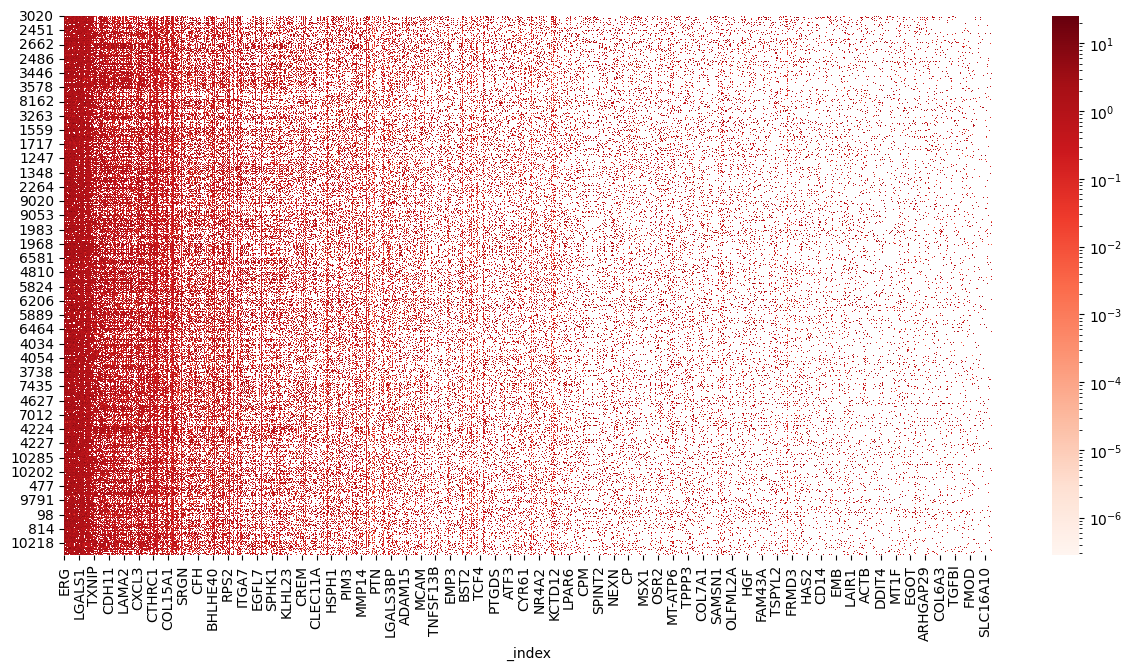

In [202]:
fig,ax=plt.subplots(figsize=(15,7))
sns.heatmap(c0, cmap ='Reds', annot = False,norm=LogNorm()) 

In [252]:
c1_mean=c1.mean()
c1_mean=c1_mean.sort_values(ascending=False).index
c1=c1[c1_mean]

<AxesSubplot: xlabel='_index'>

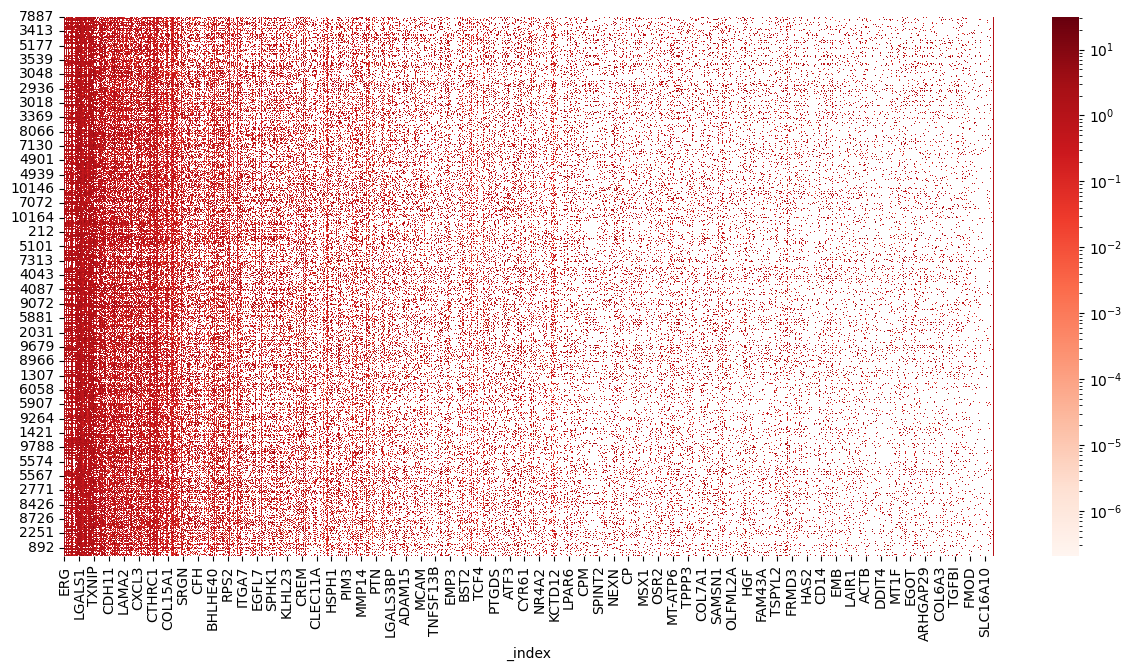

In [204]:
fig,ax=plt.subplots(figsize=(15,7))
sns.heatmap(c1, cmap ='Reds', annot = False,norm=LogNorm()) 

In [205]:
c2_mean=c2.mean()
c2_mean=c2_mean.sort_values(ascending=False).index
c2=c2[c0_mean]

<AxesSubplot: xlabel='_index'>

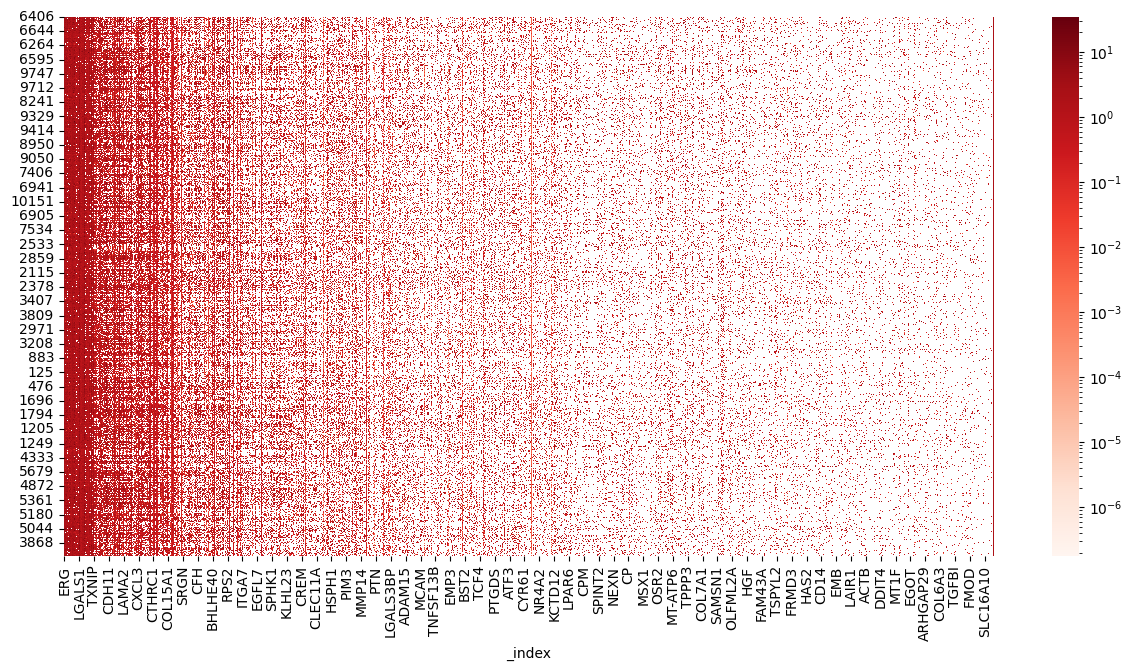

In [206]:
fig,ax=plt.subplots(figsize=(15,7))
sns.heatmap(c2, cmap ='Reds', annot = False,norm=LogNorm()) 

In [207]:
c3_mean=c3.mean()
c3_mean=c3_mean.sort_values(ascending=False).index
c3=c3[c2_mean]

<AxesSubplot: xlabel='_index'>

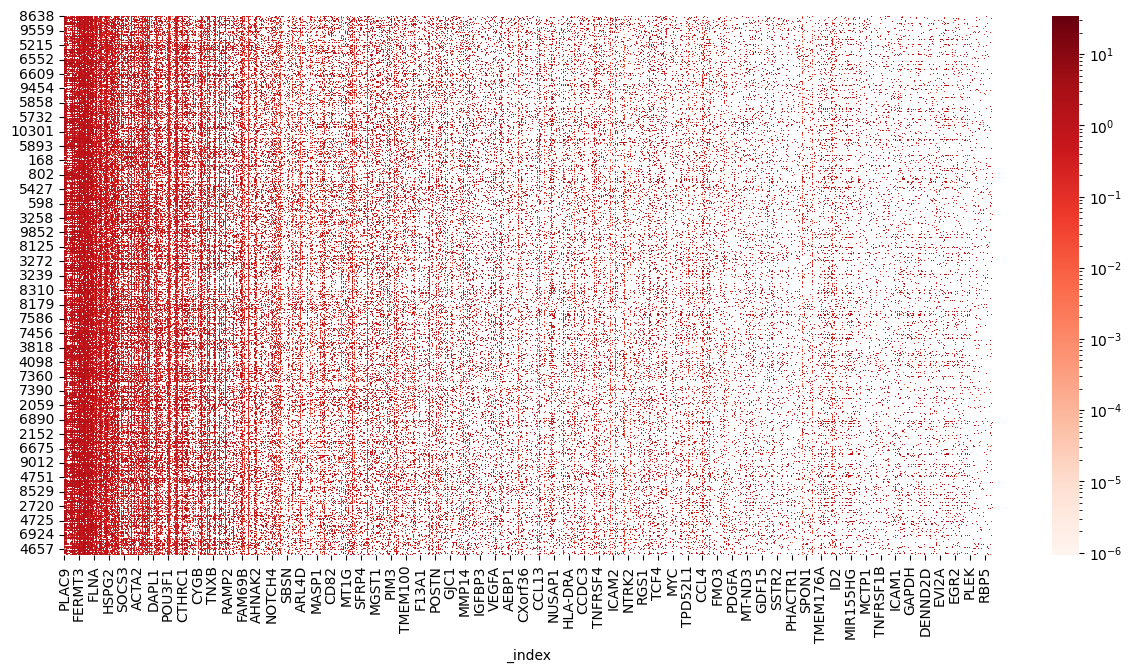

In [208]:
fig,ax=plt.subplots(figsize=(15,7))
sns.heatmap(c3, cmap ='Reds', annot = False,norm=LogNorm()) 

In [209]:
c0=emb[emb['label']==2]
c0.drop(columns='label',inplace=True)
c0_mean=c0.mean()
c0_mean=c0_mean.sort_values(ascending=False).index
c0_mean

/tmp/ipykernel_1971401/493292401.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c0.drop(columns='label',inplace=True)


Index(['PLAC9', 'IGFBP5', 'LGALS1', 'MYO1B', 'CSRP1', 'IGFBP7', 'CXCL12',
       'TAGLN', 'TPM1', 'ERG',
       ...
       'AREG', 'IGF1', 'CITED2', 'SAT1', 'MMP23B', 'ZNF385D', 'ANGPTL2',
       'S100A10', 'CLMP', 'CRISPLD2'],
      dtype='object', name='_index', length=1064)

In [191]:
emb=emb.sort_values(by='label')

In [192]:
emb

_index,CD74,COL1A1,HLA-DRA,ACTA2,CFD,CXCL14,TAGLN,PTGDS,DCN,HLA-DRB1,...,TFAP2A,PTK2,HMGA1,MPP7,FAM20A,CCDC69,CRYBG3,UTRN,NUDT4,label
3020,0.00000,1.691632,0.000000,0.294405,0.718953,1.775252,0.453771,0.054456,0.970777,0.000000,...,0.0,0.137329,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0
2812,0.00000,0.000000,0.000000,0.425049,0.001910,0.000000,1.904339,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0
2753,0.00000,0.000000,0.000000,0.213967,0.000000,0.000000,1.174980,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00000,1.674691,0.000000,0.0,0.000000,0.000000,0.0,0
4264,0.00000,1.392215,0.000000,0.185749,0.000000,1.207339,0.060558,0.111057,0.254732,0.000000,...,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.277544,0.0,0
2715,1.71477,0.000000,1.796019,0.047547,0.000000,0.000000,1.341064,0.000000,0.000000,1.896407,...,0.0,0.000000,1.89559,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8625,0.00000,0.022772,0.000000,0.512674,0.603667,0.737782,0.845817,0.011758,1.737639,0.000000,...,0.0,1.646253,0.00000,0.000000,2.128126,0.0,0.000000,0.000000,0.0,3
6989,0.00000,1.134562,0.000000,0.349890,0.439067,0.028518,0.068913,0.000000,0.833010,0.000000,...,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.496834,0.0,3
8628,1.06612,0.000000,2.211874,0.164022,0.094287,0.000000,0.415288,0.000000,0.000000,1.414129,...,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,3
8662,0.00000,1.145465,0.000000,0.093372,0.703092,0.982977,0.444458,0.000000,0.942149,0.000000,...,0.0,0.209293,0.00000,0.032938,0.038001,0.0,0.000000,0.000000,0.0,3


In [193]:
embs=emb[emb.columns[0:10367]]
season_colors = {0: 'dodgerblue', 1: 'orange', 2: 'green',3:'red'}
label_cols = pd.Series(emb.label, index=emb.index).map(season_colors)

In [194]:
embs1=embs[c0_mean]

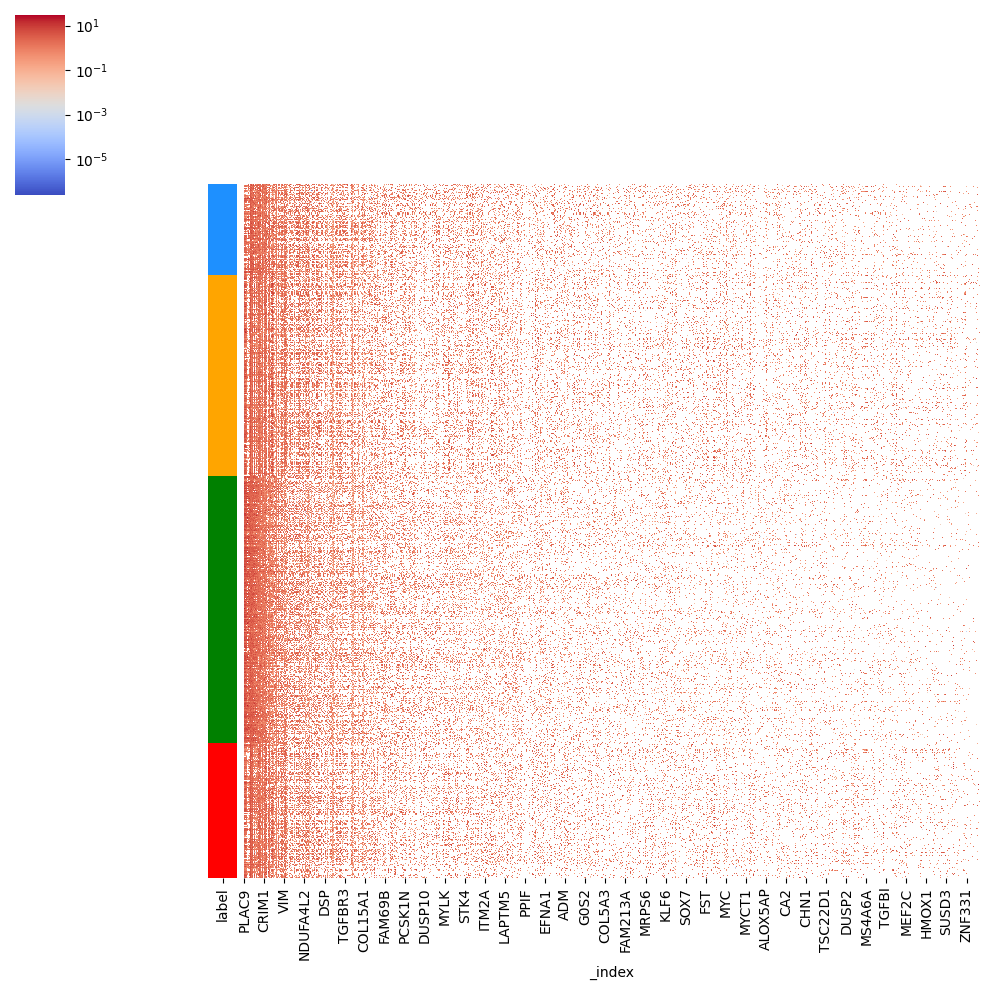

<Figure size 1600x800 with 0 Axes>

In [195]:
sns.clustermap(embs1, row_colors=label_cols,
               row_cluster=False, col_cluster=False,norm=LogNorm(),cmap='coolwarm',z_score=0,yticklabels=False, annot_kws={'size':5})
plt.savefig('Attention-score-all.png')
plt.figure(figsize=(16,8))

plt.show()


In [196]:
embs1=embs[c0_mean[0:100]]

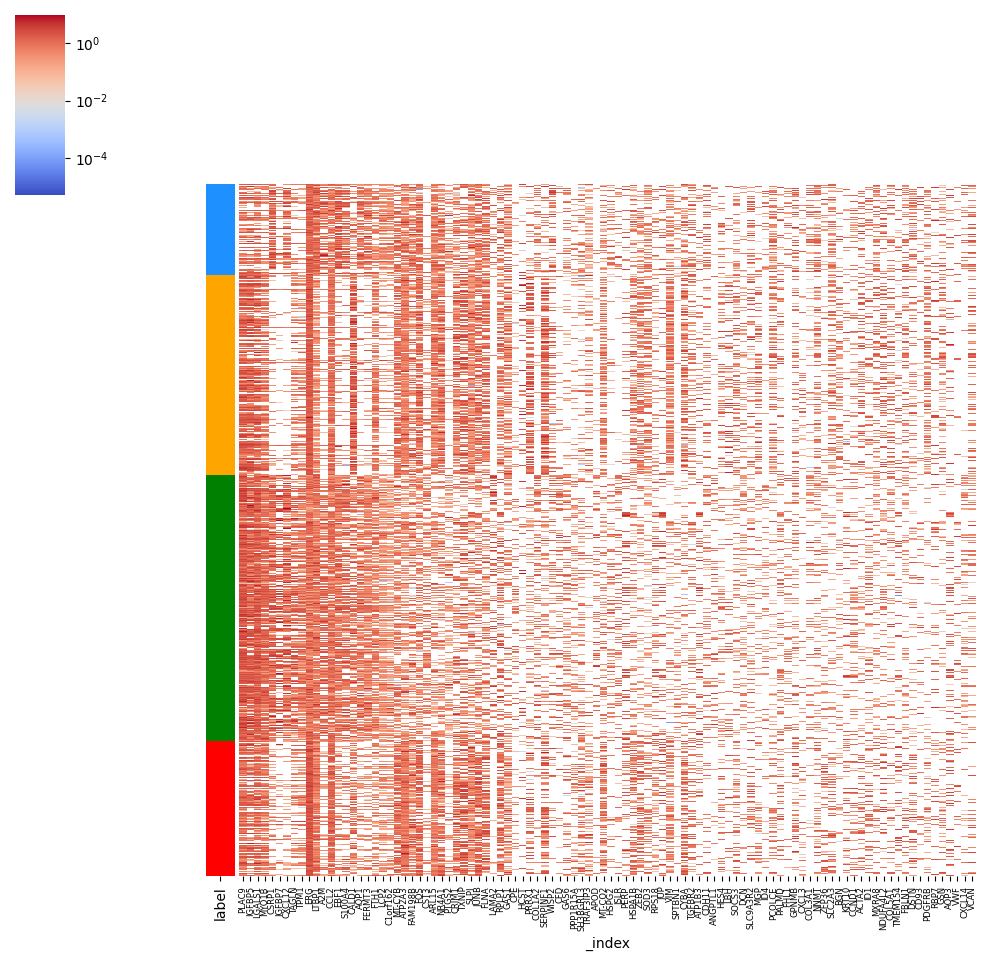

<Figure size 1600x800 with 0 Axes>

In [197]:
# Create the clustermap
g = sns.clustermap(embs1, row_colors=label_cols,
                   row_cluster=False, col_cluster=False, norm=LogNorm(),
                   cmap='coolwarm', z_score=0, xticklabels=True, yticklabels=False,
                   annot_kws={'size':5})

# Set the font size for x-axis labels
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), fontsize=6)  # Adjust the fontsize as needed

# Save the figure
plt.savefig('Attention-score-all100.png')

# Show the figure
plt.figure(figsize=(16,8))
plt.show()


In [253]:
c0.to_csv('Diabetic-signatures.csv')
c1.to_csv('Healing-DFU-signatures.csv')
c2.to_csv('Healthy-signatures.csv')
c3.to_csv('Non-Healing-DFU-signatures.csv')

In [230]:
#c0.drop(columns='label',inplace=True)
#c1.drop(columns='label',inplace=True)
#c2.drop(columns='label',inplace=True)
#c3.drop(columns='label',inplace=True)

In [254]:
c0_1=c0[c0.columns[0:100]]

In [255]:
c1_1=c1[c1.columns[0:100]]

In [256]:
c2_1=c2[c2.columns[0:100]]

In [257]:
c3_1=c3[c3.columns[0:100]]

In [258]:
c1_1

_index,ERG,CALD1,PLAC9,IGFBP5,LGALS1,SERPINF1,CCL2,PRRX1,FOS,NR4A1,...,FHL2,BHLHE40,SYNPO2,FOSB,NFKBIA,SH3BGRL3,CD68,LRP1,COL15A1,CIITA
7887,2.278736,4.738614,2.677942,2.434948,2.727727,0.000000,2.860507,3.331631,0.000000,1.118954,...,2.362901,0.000000,1.953778,0.000000,0.000000,0.610000,0.000000,0.000000,0.000000,0.065193
3392,2.641665,6.205926,3.543963,4.528252,3.344955,0.395491,2.479305,4.394093,0.000000,0.895476,...,2.978796,0.129636,2.715838,0.000000,0.000000,0.335330,0.126823,0.399956,0.554711,0.153828
7815,2.902209,4.851481,4.065158,4.436234,2.901849,0.763978,2.364020,2.876462,1.413777,1.732282,...,2.315773,1.566643,1.892634,0.000000,0.000000,0.314395,0.000000,0.000000,0.713440,0.103329
7886,2.431280,3.280385,2.404055,1.506540,2.306290,1.460212,2.598368,2.621181,2.428607,2.478590,...,1.300860,0.000000,1.721309,1.159532,0.000000,0.065910,0.189079,0.000000,0.000000,0.090627
5266,2.783750,3.855768,2.079503,1.759383,0.000000,2.755602,2.007263,2.963256,2.148975,1.995177,...,1.829806,0.042980,2.554375,1.482158,0.777032,0.000000,0.000000,0.613566,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6327,3.070906,2.391866,4.656357,4.688003,4.259943,2.291287,3.086100,1.611654,1.732544,1.414724,...,0.033388,0.000000,0.075038,1.199459,4.294014,1.752988,0.000000,0.000000,0.070389,0.000000
5625,2.033478,1.158531,0.652053,0.000000,0.000000,3.898536,1.111356,1.315453,2.676227,0.975281,...,0.742259,0.254927,1.194294,0.226070,0.564856,0.014321,0.735086,0.978378,1.418288,0.064733
2331,2.782083,1.638165,0.062728,0.527390,0.131724,1.726068,1.533652,2.326680,2.458647,2.144674,...,0.656075,0.506780,1.411101,0.776428,0.143486,0.411034,0.260350,0.848555,0.660788,0.154398
90,2.296510,0.552453,0.629095,0.124874,0.617811,0.616398,0.551884,0.447256,4.066481,3.478269,...,0.003706,1.831987,0.000000,2.266838,0.414992,1.407385,3.850085,0.000000,0.000000,0.000000


In [280]:
x=np.concatenate([c2_1.columns,c3_1.columns,c0_1.columns])

In [281]:
c3_unique=c1_1.columns[c1_1.columns.isin(x)==False]

In [282]:
c3_unique

Index(['NR2F2', 'COL4A1', 'CFH', 'TNC', 'RARRES2', 'TMSB4X', 'MRGPRF',
       'CTHRC1', 'LCP1', 'NOTCH3', 'ATP1B2', 'ENTPD1', 'HSPH1', 'ACP5', 'FHL2',
       'BHLHE40', 'SYNPO2', 'NFKBIA', 'CD68', 'LRP1', 'COL15A1', 'CIITA'],
      dtype='object', name='_index')

In [283]:
len(c3_unique)

22

In [214]:
diab=pd.DataFrame(c0.sum(),columns=['AS'])

In [215]:
diab

,AS
_index,
FOS,3477.129150
CD93,3285.522949
RPS18,3220.647949
VWF,2977.047119
FLNA,2666.825928
...,...
CTSZ,12.184009
TMSB4X,12.112070
FHL2,8.789168


In [216]:
healing=pd.DataFrame(c1.sum(),columns=['AS'])

In [217]:
healthy=pd.DataFrame(c2.sum(),columns=['AS'])

In [218]:
n_healing=pd.DataFrame(c3.sum(),columns=['AS'])

In [219]:
healing

,AS
_index,
FOS,6795.157227
FCGR2B,6564.151367
MT-ATP6,5178.926270
ELN,4834.546875
VIM,4686.992676
...,...
MAP3K7CL,26.722347
LEPR,24.374090
CEBPD,24.002483


In [220]:
diab[0:300]

,AS
_index,
FOS,3477.129150
CD93,3285.522949
RPS18,3220.647949
VWF,2977.047119
FLNA,2666.825928
...,...
CXCL12,371.080170
TPPP3,370.520264
NEGR1,365.624176


In [226]:
diab[0:100].to_csv('Diabetic_gsea.csv')

In [227]:
healing[0:100].to_csv('Healing_gsea.csv')
healthy[0:100].to_csv('Healthy_gsea.csv')
n_healing[0:100].to_csv('Non_Healing_gsea.csv')

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Diabetic_gsea.csv')
df1=pd.read_csv('Healing_gsea.csv')
df2=pd.read_csv('Healthy_gsea.csv')
df3=pd.read_csv('Non_Healing_gsea.csv')

In [3]:
df['label']='Diabetic'
df1['label']='Healing'
df2['label']='Healthy'
df3['label']='Non-Healing'

In [4]:
df0=pd.concat([df,df1,df2,df3,])

In [5]:
df0

,_index,AS,label
0,FOS,3477.1292,Diabetic
1,CD93,3285.5230,Diabetic
2,RPS18,3220.6480,Diabetic
3,VWF,2977.0470,Diabetic
4,FLNA,2666.8260,Diabetic
...,...,...,...
95,MXRA8,959.2895,Non-Healing
96,CD36,951.6249,Non-Healing
97,TNFSF10,951.3489,Non-Healing
98,CIITA,947.1119,Non-Healing


In [285]:
c0

_index,CD74,COL1A1,HLA-DRA,ACTA2,CFD,CXCL14,TAGLN,PTGDS,DCN,HLA-DRB1,...,TGFBR3,TFAP2A,PTK2,HMGA1,MPP7,FAM20A,CCDC69,CRYBG3,UTRN,NUDT4
6406,0.000000,1.359038,0.000000,0.000000,3.090163,3.150955,1.077922,1.171093,2.375517,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,2.097876,0.000000,0.0,0.622589,0.000000
10222,0.000000,0.000000,0.000000,2.695806,0.000000,0.000000,5.055113,0.000000,0.000000,0.000000,...,0.000000,0.0,1.530058,0.000000,0.0,0.000000,0.000000,0.0,0.078068,0.000000
6407,1.303928,0.000000,0.635471,0.000000,0.089161,0.000000,0.034239,0.000000,0.000000,1.093647,...,0.000000,0.0,0.631127,0.791711,0.0,0.000000,0.291706,0.0,0.077453,0.000000
10236,0.000000,0.000000,0.000000,1.940217,0.000000,0.000000,7.063768,0.000000,0.150712,0.000000,...,0.000000,0.0,1.064768,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
6440,0.000000,0.000000,0.000000,2.225154,0.046849,0.000000,6.674020,0.000000,0.048258,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3849,0.000000,0.000000,0.000000,2.794533,0.000000,0.000000,2.537318,0.000000,1.401210,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.741410,0.000000
3848,0.000000,2.974604,0.000000,0.178420,3.138087,1.401846,0.936399,0.264377,2.091363,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
5793,0.000000,0.000000,0.000000,2.187648,0.000000,0.000000,7.898237,0.000000,0.000000,0.000000,...,0.000000,0.0,0.507101,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
3874,1.050640,0.000000,0.800727,0.000000,0.006797,0.000000,0.560120,0.000000,0.000000,1.196373,...,3.506613,0.0,0.000000,0.000000,0.0,0.000000,1.175693,0.0,0.272621,0.000000


In [297]:
df=c0

In [298]:
column_name = 'APOE'
if column_name in df.columns:
    column_position = df.columns.get_loc(column_name)
    print(f'The position of column "{column_name}" is: {column_position}')
else:
    print(f'Column "{column_name}" does not exist in the DataFrame.')


The position of column "APOE" is: 18
